In [50]:
# Importing needed modules
import numpy as np
import pandas as pd
from scipy import stats
import glob
import matplotlib.pyplot as plt
import datetime

In [3]:
!dir

 Volume in drive F is Data
 Volume Serial Number is 5CFB-FEAD

 Directory of F:\Dropbox\Dropbox\School\Work\workspace\stats\Intermediate_Data_Analysis

03/28/2020  12:07 PM    <DIR>          .
03/28/2020  12:07 PM    <DIR>          ..
03/26/2020  11:18 PM                66 .gitattributes
03/28/2020  12:07 PM    <DIR>          .ipynb_checkpoints
03/25/2020  11:33 PM    <DIR>          Data_1
10/01/2019  09:54 AM         1,989,197 Data_2.csv
03/26/2020  10:55 PM            11,560 Week 1.ipynb
03/28/2020  12:07 PM                72 Week 2.ipynb
               4 File(s)      2,000,895 bytes
               4 Dir(s)  1,671,830,413,312 bytes free


In [4]:
#Obtaining all the data
data = pd.read_csv("Data_2.csv")

In [8]:
# Selectiong data from Seattle
mask = data['region'] =="Seattle"
price_seattle = data[mask]

In [14]:
# Getting only data for convential prices
mask1 = price_seattle['type'] == 'conventional'

In [15]:
data2 = price_seattle[mask1]

In [105]:
# This is where things get a little more complicated
# Getting the dates and average price
(x,y) = (np.array(data2['Date']),np.array(data2['AveragePrice']))
# This sets the type as datetime which can be used easier for math
x=x.astype('<M8')
print(len(x))
x.min()

169


numpy.datetime64('2015-01-04')

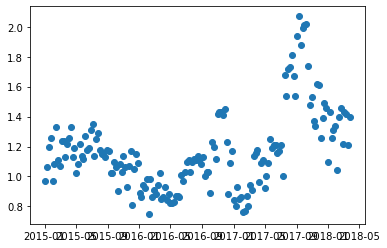

In [61]:
# Creating the plot
fig, ax = plt.subplots()
ax.scatter(x,y)

plt.show()


In [89]:
# I'm setting the time as days since the first data set point
starting = x.min()
output = list()
for i,itm in enumerate(x):
    delta = itm-starting
    output.append(delta/ np.timedelta64(1, 'D'))
x1=np.array(output)

In [81]:
# The magic
# I needed the above section done as this part won't do math on dates
slope, intercept, r_value, p_value, std_err = stats.linregress(x1,y)

In [100]:
# Printing out the dataCncluss
print('Slope:{0}\nIntercept:{1}\nr value:{2}\np value:{3}\nstd error:{4}'.format(slope, intercept, r_value, p_value, std_err))

Slope:0.0003321032555033848
Intercept:0.9744865993734771
r value:0.42039854857328596
p value:1.266443056351249e-08
std error:5.546557651378167e-05


In [106]:
x2.max()

1176.0

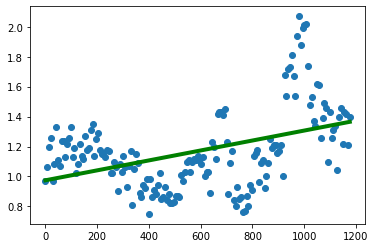

In [98]:
# Making a graph with a line
fig, ax = plt.subplots()
ax.scatter(x1,y)
x2 = np.linspace(0,x1.max())
ax.plot(x2,slope*x2+intercept,color='green',linewidth=4)

plt.show()


In [104]:
# Most expensive day for avocados
x[y==y.max()]

array(['2017-09-10'], dtype='datetime64[D]')